In [1]:
from loguru import logger
import pandas as pd

from exonamd.run import *
from exonamd.plot import pop_plot, simple_plot
from exonamd.solve import solve_namd_mc

In [2]:
file_path = "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/exo.csv"

df_exo = pd.read_csv(file_path)

print(df_exo.hostname.unique().size)

1005


In [3]:
df_interp_ss = pd.read_csv(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250814_interp.csv"
)
df_interp_ss = df_interp_ss[df_interp_ss["hostname"] == "SS"]

In [4]:
df_interp_ss.flag

18    01+1-2+2-3d+-4+4-5+5-
19    01+1-2+2-3d+-4+4-5+5-
20    01+1-2+2-3d+-4+4-5+5-
21    01+1-2+2-3d+-4+4-5+5-
22    01+1-2+2-3d+-4+4-5+5-
23    01+1-2+2-3d+-4+4-5+5-
24    01+1-2+2-3d+-4+4-5+5-
25    01+1-2+2-3d+-4+4-5+5-
Name: flag, dtype: object

In [5]:
file_path = "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/exo_interp.csv"

df_interp = pd.read_csv(file_path)

# print(df_interp.flag.unique())
indices = df_interp[df_interp['flag'].str.contains('3d', case=False, na=False)].index
df_interp = df_interp.loc[~df_interp.index.isin(indices)]


# print(df_interp.flag.unique())
print(df_interp.hostname.unique().size)

print(df_interp.groupby("sy_pnum").hostname.nunique())
print(df_interp[df_interp["sy_pnum"]==7].hostname.unique())
print(df_interp[df_interp["sy_pnum"]==8].hostname.unique())

792
sy_pnum
2    514
3    174
4     70
5     22
6     10
7      1
8      1
Name: hostname, dtype: int64
['TRAPPIST-1']
['KOI-351']


In [6]:
df_interp.columns

Index(['hostname', 'pl_name', 'rowupdate', 'sy_pnum', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2',
       'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_trueobliq',
       'pl_trueobliqerr1', 'pl_trueobliqerr2', 'flag', 'pl_relincl',
       'pl_relinclerr1', 'pl_relinclerr2'],
      dtype='object')

In [7]:
col_names = df_interp.columns.tolist()
col_names = [
    col
    for col in col_names
    if "pl_name" in col
    or "pl_orbsmax" in col
    or "pl_orbeccen" in col
    or "pl_orbincl" in col
    or "pl_bmasse" in col
]
df_interp[df_interp["sy_pnum"] == 8][col_names]

,pl_name,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2
848,KOI-351 b,0.074164,0.008375,-0.008375,2.121205,1.140639,-0.849404,0.0,0.000,0.000,89.40,1.5000,-1.5000
849,KOI-351 c,0.085820,0.006430,-0.006430,2.645293,1.466126,-0.995106,0.0,0.000,0.000,89.68,0.7400,-0.7400
850,KOI-351 d,0.310088,0.026565,-0.026565,9.056849,3.641258,-2.806323,0.0,0.000,0.000,89.95,0.2900,-0.2900
851,KOI-351 e,0.413379,0.032095,-0.032095,7.605323,3.155837,-2.192402,0.0,0.000,0.000,89.95,0.1900,-0.1900
852,KOI-351 f,0.504828,0.047580,-0.047580,8.522578,3.815074,-2.771738,0.0,0.000,0.000,89.86,0.3100,-0.3100
853,KOI-351 g,0.716946,0.043645,-0.043645,22.705779,12.707897,-12.657897,0.0,0.011,-0.007,89.95,0.0450,-0.0350
854,KOI-351 h,0.972148,0.059930,-0.059930,235.749519,19.219170,-19.219170,0.0,0.002,-0.003,89.95,0.6555,-0.6535
855,KOI-351 i,0.161454,0.000000,0.000000,2.230629,1.477491,-0.995818,0.0,0.000,0.000,89.20,0.5900,-1.3000


2025-09-10 18:26:45.148 | DEBUG    | exonamd.run:calc_namd:334 - Dropping columns that are no longer needed
2025-09-10 18:26:45.150 | DEBUG    | exonamd.run:calc_namd:336 - Columns dropped
2025-09-10 18:26:45.151 | INFO     | exonamd.run:calc_namd:345 - Computing the relative NAMD
2025-09-10 18:26:47.485 | INFO     | exonamd.run:calc_namd:353 - Relative NAMD computed
2025-09-10 18:26:47.539 | INFO     | exonamd.run:calc_namd:408 - Defining the core sample
2025-09-10 18:26:47.802 | INFO     | exonamd.run:calc_namd:411 - Core sample defined
/home/ariel/andrea.bocchieri/.local/lib/python3.10/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(
2025-09-10 18:26:47.827 | INFO     | exonamd.run:calc_namd:444 - Computing the Monte Carlo relative NAMD
2025-09-10 18:26:56.676 | INFO     | exonamd.run:calc_namd:455 - Relative

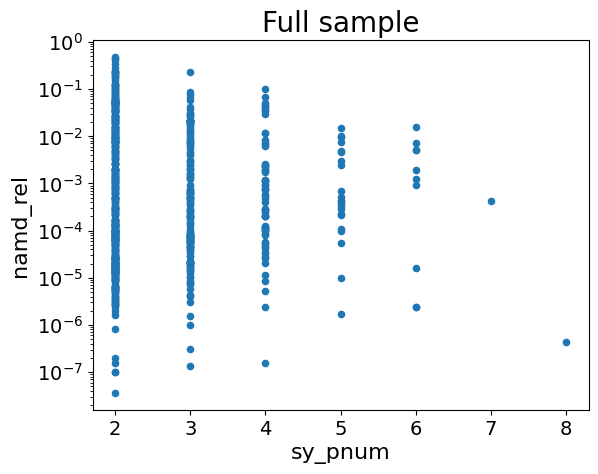

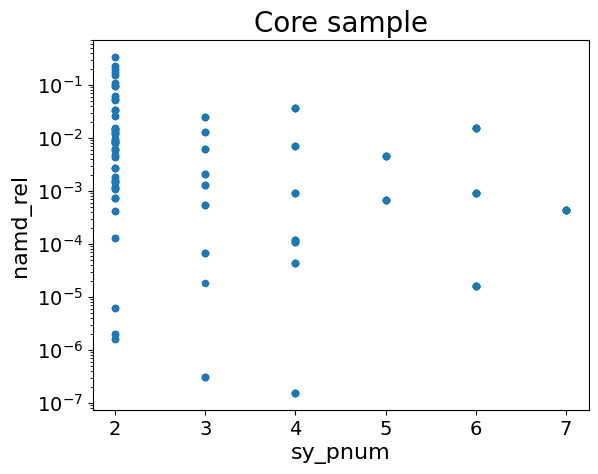

In [8]:
df_namd = calc_namd(
    df=df_interp,
    save=False,
    plot=True,
    core=True,
    filt=None,
    which=["rel"],
    use_trunc_normal=True,
    threshold=1000,
    Npt=int(1e5),
)

df_namd_ss = calc_namd(
    df=df_interp_ss,
    save=False,
    plot=False,
    core=False,
    filt=None,
    which=["abs"],  # because the inc are not indicated in the table
    use_trunc_normal=True,
    threshold=1000,
    Npt=int(1e5),
)

df_namd_ss[
    ["namd_rel", "namd_rel_mc", "namd_rel_q16", "namd_rel_q50", "namd_rel_q84"]
] = df_namd_ss[
    ["namd_abs", "namd_abs_mc", "namd_abs_q16", "namd_abs_q50", "namd_abs_q84"]
]
df_namd = pd.concat([df_namd, df_namd_ss], ignore_index=True)  # adding the SS

In [9]:
df_namd.groupby("sy_pnum").hostname.nunique()

sy_pnum
2    45
3     9
4     7
5     2
6     3
7     1
8     1
Name: hostname, dtype: int64

In [10]:
df_namd = df_namd[df_namd.hostname != "XO-2 N"]

In [11]:
df_namd.groupby("sy_pnum").hostname.nunique()

sy_pnum
2    45
3     8
4     7
5     2
6     3
7     1
8     1
Name: hostname, dtype: int64

In [12]:
df_namd.hostname.unique().size

67

2025-09-10 18:26:58.190 | INFO     | __main__:<module>:1 - Plotting the relative NAMD vs. multiplicity


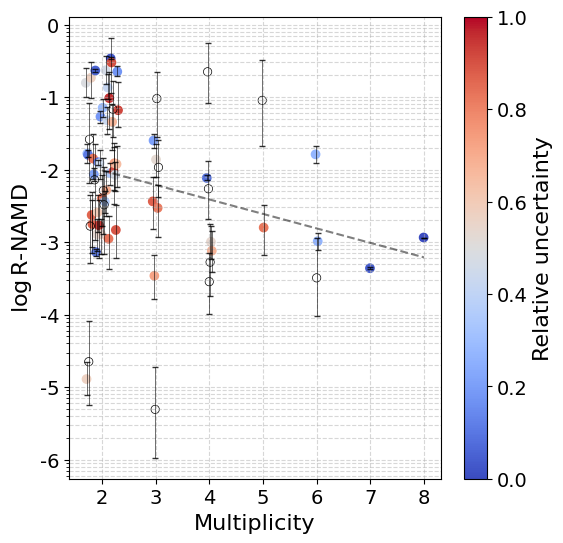

2025-09-10 18:26:59.454 | INFO     | __main__:<module>:13 - Plot done


In [13]:
logger.info("Plotting the relative NAMD vs. multiplicity")
pop_plot(
    df=df_namd.groupby("hostname").apply(
        lambda g: g.select_dtypes(exclude=["object"]).mean(),
        # include_groups=False,
    ),
    kind="rel",
    # title="Core planets",
    which="namd",
    yscale="log",
    out_path="/home/ariel/andrea.bocchieri/DATA/ExoNAMD/notebook/plots/exo_namd_rel_paper.pdf",
)
logger.info("Plot done")

In [14]:
df_namd[df_namd["hostname"] == "SS"][["namd_rel", "namd_rel_q50", "namd_abs", "namd_abs_q50"]]

,namd_rel,namd_rel_q50,namd_abs,namd_abs_q50
178,0.001157,0.001157,0.001157,0.001157
179,0.001157,0.001157,0.001157,0.001157
180,0.001157,0.001157,0.001157,0.001157
181,0.001157,0.001157,0.001157,0.001157
182,0.001157,0.001157,0.001157,0.001157
183,0.001157,0.001157,0.001157,0.001157
184,0.001157,0.001157,0.001157,0.001157
185,0.001157,0.001157,0.001157,0.001157


In [15]:
df_namd["hostname"].unique()

array(['14 Her', '55 Cnc', 'EPIC 249893012', 'GJ 581', 'GJ 876',
       'HAT-P-11', 'HD 106315', 'HD 111232', 'HD 118203', 'HD 136352',
       'HD 15337', 'HD 206893', 'HD 23472', 'HD 260655', 'HD 30177',
       'HD 62364', 'HD 66428', 'HD 72659', 'HD 73267', 'HD 73583',
       'K2-138', 'K2-146', 'K2-199', 'K2-3', 'K2-32', 'K2-38', 'KOI-134',
       'KOI-94', 'Kepler-103', 'Kepler-109', 'Kepler-11', 'Kepler-117',
       'Kepler-138', 'Kepler-1972', 'Kepler-30', 'Kepler-411',
       'Kepler-419', 'Kepler-47', 'Kepler-79', 'Kepler-87', 'LTT 1445 A',
       'LTT 3780', 'PDS 70', 'TOI-1064', 'TOI-1130', 'TOI-1136',
       'TOI-125', 'TOI-1338 A', 'TOI-1408', 'TOI-1468', 'TOI-201',
       'TOI-2015', 'TOI-216', 'TOI-2202', 'TOI-2525', 'TOI-270',
       'TOI-406', 'TOI-421', 'TOI-4562', 'TOI-776', 'TOI-836',
       'TRAPPIST-1', 'WASP-148', 'WASP-47', 'bet Pic', 'iot Dra', 'SS'],
      dtype=object)

In [16]:
# Task 1: sample the NAMD for a given host
hostname = "K2-146"
kind = "rel"
Npt = int(1e6)
threshold = 100

logger.info(f"Selecting the host: {hostname}")
host = df_namd[df_namd["hostname"] == hostname]
logger.info("Host selected")

logger.info("Computing the Monte Carlo relative NAMD")
retval = solve_namd_mc(
    host=host,
    kind=f"{kind}",
    Npt=Npt,
    threshold=threshold,
    full=True,
)
logger.info("Values computed")

2025-09-10 18:26:59.511 | INFO     | __main__:<module>:7 - Selecting the host: K2-146
2025-09-10 18:26:59.516 | INFO     | __main__:<module>:9 - Host selected
2025-09-10 18:26:59.517 | INFO     | __main__:<module>:11 - Computing the Monte Carlo relative NAMD
2025-09-10 18:26:59.519 | ERROR    | __main__:<module>:12 - An error has been caught in function '<module>', process 'MainProcess' (881482), thread 'MainThread' (139785528698688):
Traceback (most recent call last):

  File "/ariel/data/andrea.bocchieri/.conda/envs/exo_namd/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x7f225a61c920, file "/ariel/data/andrea.bocchieri/.conda/envs/exo_namd/lib/python3.10/site-packages...
           └ <function _run_code at 0x7f225a6011b0>

In [17]:
# Task 2: plot the NAMD for a given host
logger.info("Plotting the relative NAMD distribution")
simple_plot(
    df=retval,
    kind=f"{kind}",
    title=hostname,
    which="namd",
    scale="log",
    # out_path=out_path,
)
logger.info("Plot done")

2025-09-10 18:26:59.626 | INFO     | __main__:<module>:2 - Plotting the relative NAMD distribution
2025-09-10 18:26:59.628 | ERROR    | __main__:<module>:3 - An error has been caught in function '<module>', process 'MainProcess' (881482), thread 'MainThread' (139785528698688):
Traceback (most recent call last):

  File "/ariel/data/andrea.bocchieri/.conda/envs/exo_namd/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x7f225a61c920, file "/ariel/data/andrea.bocchieri/.conda/envs/exo_namd/lib/python3.10/site-packages...
           └ <function _run_code at 0x7f225a6011b0>
  File "/ariel/data/andrea.bocchieri/.conda/envs/exo_namd/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
         │     └ {'__name_

In [18]:
file_path = "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/exo_namd.csv"

df_namd = pd.read_csv(file_path)

# custom drop hostnames: 55 Cnc, HAT-P-11, XO-2 N
df_namd = df_namd[~df_namd["hostname"].isin(["55 Cnc", "HAT-P-11", "XO-2 N"])]

print(df_namd.hostname.unique().size)

print(df_namd["flag"].unique())

print(df_namd.groupby("sy_pnum").hostname.nunique())
# print(df_namd[df_namd["sy_pnum"] == 7].hostname.unique())

# df_namd[df_namd["sy_pnum"]==7][['pl_name','pl_trueobliq', 'flag']]
df_namd[["pl_name", "pl_trueobliq", "flag", "pl_bmasse", "pl_orbsmax", "sy_pnum"]]

789
['05d+-' '03+3-5d+-' '04+4-5d+-' '03+-5d+-' '01+1-2+2-5d+-' '01+1-5d+-'
 '01+-3+-4+4-5d+-' '01+-2+-3+-4+4-5d+-' '01+-2+-4+4-5d+-' '02+-5d+-'
 '01+1-3+-5d+-' '01+-2+2-5d+-' '01+-5d+-' '01+-3+-5d+-' '03+-4+4-5d+-'
 '02+-4+4-5d+-' '0' '05+-' '02+2-4+4-5d+-' '02+2-3+-4+4-5d+-'
 '02+2-3+3-4+4-5d+-' '02+2-5d+-' '01+-2+2-3+-5d+-' '01+1-' '01+1-3+-5+-'
 '01+-2+-5d+-' '01+1-3+3-5d+-' '01+-2+-3+-5d+-' '01+1-2+-5d+-'
 '01+1-2+2-5+-' '01+1-2+-3+3-5d+-' '03+3-4+4-5d+-' '01+1-4+4-5d+-'
 '01+1-2+2-3+3-5d+-' '01+1-2+-4+4-5d+-' '01+-2+2-3+3-4+4-5d+-'
 '01+1-2+-3+3-4+4-5d+-' '02+-3+3-5d+-' '01+1-3+3-4+4-5d+-' '03+5d+-'
 '03+-4+4-5+-' '01+1-2+2-3+3-4+4-5d+-' '02+2-3+3-5d+-' '02+-3+3-4+4-5d+-'
 '04+4-' '03+3-4+4-5+-' '01+1-3+3-5+-' '01+-2+2-3+-4+4-5d+-'
 '01+-2+2-4+4-5d+-' '01+1-2+-3+-4+4-5d+-' '01+-4+4-5d+-'
 '01+1-2+2-4+4-5d+-' '01+1-2+2-3+-5d+-' '01+-2+-5+-' '02+2-' '02+2-5+-'
 '01+1-3+-4+4-5d+-' '01+-5+-']
sy_pnum
2    513
3    173
4     70
5     21
6     10
7      1
8      1
Name: hostname, dtype

,pl_name,pl_trueobliq,flag,pl_bmasse,pl_orbsmax,sy_pnum
0,14 Her b,-15.555,05d+-,1523.958887,2.810000,2
1,14 Her c,0.000,05d+-,1720.246253,14.162000,2
7,7 CMa b,0.000,03+3-5d+-,699.180900,1.850000,2
8,7 CMa c,0.000,03+3-5d+-,283.206050,2.179000,2
9,AU Mic b,0.000,05d+-,17.050000,0.064508,3
...,...,...,...,...,...,...
2007,bet Pic c,-0.519,05d+-,3041.466109,2.690000,2
2008,iot Dra b,40.000,05d+-,2815.850000,1.287500,2
2009,iot Dra c,0.000,05d+-,4958.123149,19.400000,2
2010,nu Oph b,0.000,03+3-5d+-,7057.732980,1.790000,2
